**SCRAPING DATA**


In [ ]:
pip install BeautifulSoup4

In [ ]:
pip install selenium

In [ ]:
pip install pandas

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
from ipywidgets import IntProgress
from IPython.display import display

In [ ]:
movies_title = []
movies_sinopsis = []
movies_genre = []

max_data = 2000

In [ ]:

url = "https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&sort=num_votes,desc"

driver = webdriver.Chrome()
driver.get(url)

wait = WebDriverWait(driver, 10)

data_loaded = 0
while True:
    try:
        load_more_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, 'ipc-see-more__text')))

        ActionChains(driver).move_to_element(load_more_button).click(load_more_button).perform()

        time.sleep(2)
        data_loaded += 100

        print("data loaded: ", data_loaded)
        if data_loaded >= max_data:
            print(f"Already loaded {data_loaded} items. Stopping.")
            break

    except Exception as e:
        print("No more data to load or error:", e)
        break

In [ ]:
html_source = driver.page_source
soup = BeautifulSoup(html_source, "html.parser")

print("Begin to extract data")

f = IntProgress(min=0, max=max_data)
display(f)

titles = soup.find_all('h3', class_="ipc-title__text")
sinopsis = soup.find_all('div', class_ = "ipc-html-content-inner-div")

info_buttons = driver.find_elements(By.CLASS_NAME, 'ipc-icon-button.dli-info-icon')

for index, button in enumerate(info_buttons):
    try:
        wait.until(EC.element_to_be_clickable(button))
        ActionChains(driver).move_to_element(button).click(button).perform()
        modal = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "ipc-promptable-base__panel")))
        time.sleep(1)

        list_items = driver.find_elements(By.XPATH, "//ul[@data-testid='btp_gl']//li[@class='ipc-inline-list__item']")
        categories = [item.text for item in list_items]
        movies_genre.append(categories)

        close_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, 'ipc-promptable-base__close')))
        close_button.click()

        f.value +=1

    except Exception as e:
        print(f"Error clicking button {index + 1}: {e}")

In [ ]:
driver.quit()

In [ ]:
for i in titles:
    text = i.text.strip()
    if text[0].isdigit():
        title = text.split(".")[1]
        movies_title.append(title)
len(movies_title)

In [ ]:
for i in sinopsis:
    text  = i.text.strip()
    movies_sinopsis.append(text)
len(movies_sinopsis)

In [ ]:
for i in rating:
    text = i.text.strip()
    movies_rating.append(text)
len(movies_rating)

In [ ]:
movies_genre[101]

In [ ]:
print(len(movies_title))
print(len(movies_sinopsis))
print(len(movies_genre))
PRINT(len(movies_rating))

In [ ]:
movies_title_fixed = movies_title[:max_data]
movies_sinopsis_fixed = movies_sinopsis[:max_data]
movies_genre_fixed= movies_genre[:max_data]

if len(movies_title) != len(movies_sinopsis):
    print("Error: Arrays must have the same length.")
else:
    data = {"title": movies_title_fixed, "sinopsis": movies_sinopsis_fixed, "genre": movies_genre_fixed}
    df = pd.DataFrame(data)

    csv_filename = "movies (6).csv"
    df.to_csv(csv_filename, index=False, encoding="utf-8")
    print(f"Data tersimpan di {csv_filename}")

**IMPORT DATA**

In [1]:
import pandas as pd

movies_df = pd.read_csv('movies (1) (1).csv')
movies_df['Genre'] = movies_df[['genre__001', 'genre__002', 'genre__003']].fillna('').agg(', '.join, axis=1)
movies_df['Genre'] = movies_df['Genre'].str.strip(', ').replace(', ,', ',')
movies_df = movies_df.drop(columns=['genre__001', 'genre__002', 'genre__003', 'rating'])

movies_df.to_csv('movies (6).csv', index=False)

In [2]:
import pandas as pd

df = pd.read_csv('movies (6).csv')
print(df.head())

                       title  \
0   The Shawshank Redemption   
1            The Dark Knight   
2                  Inception   
3                 Fight Club   
4            Game of Thrones   

                                            sinopsis  \
0  A banker convicted of uxoricide forms a friend...   
1  When a menace known as the Joker wreaks havoc ...   
2  A thief who steals corporate secrets through t...   
3  An insomniac office worker and a devil-may-car...   
4  Nine noble families fight for control over the...   

                       Genre  
0                      Drama  
1       Action, Crime, Drama  
2  Action, Adventure, Sci-Fi  
3                      Drama  
4   Action, Adventure, Drama  


In [3]:
genre_counts = df['Genre'].value_counts()
print(genre_counts)

Genre
Action, Adventure, Sci-Fi       104
Animation, Adventure, Comedy     83
Action, Adventure, Fantasy       62
Comedy, Drama, Romance           62
Comedy                           61
                               ... 
Adventure, Drama, Horror          1
Animation, Comedy, Fantasy        1
Fantasy, Mystery, Sci-Fi          1
Biography, Drama, Thriller        1
Adventure, Comedy, Musical        1
Name: count, Length: 230, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2000 non-null   object
 1   sinopsis  2000 non-null   object
 2   Genre     2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


**OVERSAMPLING**

In [5]:
df = pd.read_csv('movies (6).csv')
genre_counts = df['Genre'].value_counts()
max_count = genre_counts.max()
df_balanced = pd.concat([
    genre_data.sample(max_count, replace=True, random_state=42) if len(genre_data) < max_count else genre_data
    for genre, genre_data in df.groupby('Genre')
])
print("Jumlah genre setelah penyeimbangan:")
print(df_balanced['Genre'].value_counts())

df_balanced.to_csv('movies_seimbang.csv', index=False)

Jumlah genre setelah penyeimbangan:
Genre
Action, Adventure               104
Comedy, Horror, Mystery         104
Comedy, Horror, Thriller        104
Comedy, Music                   104
Comedy, Music, Romance          104
                               ... 
Adventure, Sci-Fi               104
Animation, Action, Adventure    104
Animation, Action, Comedy       104
Animation, Action, Crime        104
Thriller                        104
Name: count, Length: 230, dtype: int64


**PRE-PROCESSING**

In [6]:
!pip install spacy

In [7]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

nlp = spacy.load('en_core_web_sm')
df = pd.read_csv('movies_seimbang.csv')
def clean_and_remove_stopwords(text):
    doc = nlp(text.lower())
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

df['sinopsis_clean'] = df['sinopsis'].apply(clean_and_remove_stopwords)
print(df[['sinopsis', 'sinopsis_clean']].head())

                                            sinopsis  \
0  Street-smart Nathan Drake is recruited by seas...   
1  In 1935, Indiana Jones is tasked by Indian vil...   
2  Set in 1957, it pits Indiana Jones against Sov...   
3  Street-smart Nathan Drake is recruited by seas...   
4  When the Dark Elves attempt to plunge the univ...   

                                      sinopsis_clean  
0  street smart nathan drake recruit seasoned tre...  
1  indiana jones task indian villager reclaim roc...  
2  set pit indiana jones soviet kgb agent lead ir...  
3  street smart nathan drake recruit seasoned tre...  
4  dark elve attempt plunge universe darkness tho...  


In [9]:
df['Genre_list'] = df['Genre'].apply(lambda x: x.split(', '))

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre_list']), columns=mlb.classes_)
df_final = pd.concat([df[['sinopsis_clean']], df_genre_encoded], axis=1)
df_genre_encoded.to_csv('genre_one_hot_encoding.csv', index=False)
print(df_final.head())
print("OHE diismpan dicsv.")

                                      sinopsis_clean  Action  Adventure  \
0  street smart nathan drake recruit seasoned tre...       1          1   
1  indiana jones task indian villager reclaim roc...       1          1   
2  set pit indiana jones soviet kgb agent lead ir...       1          1   
3  street smart nathan drake recruit seasoned tre...       1          1   
4  dark elve attempt plunge universe darkness tho...       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  Family  ...  \
0          0          0       0      0            0      0       0  ...   
1          0          0       0      0            0      0       0  ...   
2          0          0       0      0            0      0       0  ...   
3          0          0       0      0            0      0       0  ...   
4          0          0       0      0            0      0       0  ...   

   Music  Musical  Mystery  Romance  Sci-Fi  Short  Sport  Thriller  War  \
0      0        0     

In [10]:
import joblib

joblib.dump(mlb, 'mlb_genre.pkl')
print("MultiLabelBinarizer disimpan ke 'mlb_genre.pkl'.")

MultiLabelBinarizer disimpan ke 'mlb_genre.pkl'.


**FEATURE ENGINEERING**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['sinopsis_clean'])

tfidf_features = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
print(X_tfidf)
tfidf_features.to_csv('tfidf_features.csv', index=False)
print("TF-IDF diismpan dicsv'.")

  (0, 4271)	0.17703428203219176
  (0, 4116)	0.22126690865754067
  (0, 3008)	0.24590815027904234
  (0, 1329)	0.25913474290978933
  (0, 3637)	0.17146534659598198
  (0, 3947)	0.25913474290978933
  (0, 4591)	0.19720204598786667
  (0, 2151)	0.1546557545134864
  (0, 4784)	0.2433280356065288
  (0, 4328)	0.2433280356065288
  (0, 4327)	0.2472836411850997
  (0, 3636)	0.1904649301853936
  (0, 1746)	0.19453285331125436
  (0, 144)	0.25913474290978933
  (0, 1654)	0.25913474290978933
  (0, 2676)	0.25913474290978933
  (0, 2633)	0.15602483824480204
  (0, 4984)	0.11959855757551274
  (0, 94)	0.20695174069645342
  (0, 2130)	0.17015851917358416
  (0, 2900)	0.25913474290978933
  (1, 2232)	0.2729352422763616
  (1, 2419)	0.25688237966171085
  (1, 4417)	0.2230241135397984
  (1, 2231)	0.2528693538967704
  :	:
  (23918, 677)	0.26654280633022903
  (23918, 3985)	0.20978613888477052
  (23918, 1110)	0.25203763127007134
  (23918, 2527)	0.25850260047756574
  (23918, 4046)	0.23865213934336182
  (23918, 699)	0.260789558

In [12]:
import joblib

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TF-IDF vectorizer berhasil disimpan ke 'tfidf_vectorizer.pkl'.")

TF-IDF vectorizer berhasil disimpan ke 'tfidf_vectorizer.pkl'.


###### EXPLORASI FEATURE ENGINEERING ######



In [13]:
print(f'Dimensi dataset TF-IDF: {tfidf_features.shape}')

print('Ringkasan statistik:')
print(tfidf_features.describe())

Dimensi dataset TF-IDF: (23920, 5000)
Ringkasan statistik:
            abandon        abbott          abby        abduct         abide  \
count  23920.000000  23920.000000  23920.000000  23920.000000  23920.000000   
mean       0.000488      0.000083      0.000114      0.000763      0.000111   
std        0.013093      0.005266      0.005301      0.017411      0.005728   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.409521      0.332531      0.247240      0.425250      0.295342   

            ability          able        aboard      abortion       abraham  \
count  23920.000000  23920.000000  23920.000000  23920.000000  23920.000000   
mean       0.002853      0.000560      0.000774      0.000136      0.00

In [15]:
avg_tfidf = tfidf_features.mean().sort_values(ascending=False)

print('10 kata dengan nilai rata-rata TF-IDF tertinggi:')
print(avg_tfidf.head(10))

10 kata dengan nilai rata-rata TF-IDF tertinggi:
find        0.016197
life        0.015499
young       0.014610
world       0.014457
new         0.012946
man         0.011885
war         0.011231
woman       0.011194
help        0.011159
discover    0.011080
dtype: float64


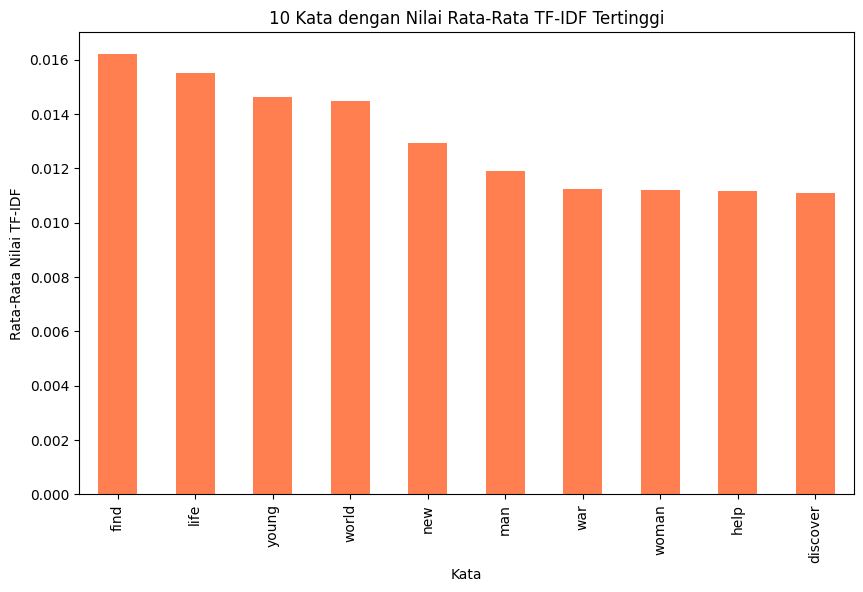

In [18]:
top_words = avg_tfidf.head(10)
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='coral')
plt.title('10 Kata dengan Nilai Rata-Rata TF-IDF Tertinggi')
plt.xlabel('Kata')
plt.ylabel('Rata-Rata Nilai TF-IDF')
plt.show()


**SPLIT DATA**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_genre_encoded, test_size=0.2, random_state=42)

print(f"Data train: {X_train.shape}")
print(f"Data test: {X_test.shape}")

Data train: (19136, 5000)
Data test: (4784, 5000)


**KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
model_knn = OneVsRestClassifier(knn)
model_knn.fit(X_train, y_train)
accuracy_train_knn = model_knn.score(X_train, y_train)
print(f"\nAkurasi pada data train (KNN): {accuracy_train_knn:.4f}")

y_train_pred_knn = model_knn.predict(X_train)
print(classification_report(y_train, y_train_pred_knn, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data train (KNN): 0.9610
              precision    recall  f1-score   support

      Action       0.98      0.96      0.97      4646
   Adventure       0.98      0.95      0.97      3909
   Animation       0.97      0.96      0.97      1580
   Biography       0.97      0.98      0.98      1421
      Comedy       0.98      0.97      0.98      5927
       Crime       0.98      0.96      0.97      3483
 Documentary       1.00      1.00      1.00        88
       Drama       0.98      0.98      0.98      8975
      Family       0.98      0.99      0.98      1402
     Fantasy       0.98      0.99      0.98      2991
   Film-Noir       1.00      1.00      1.00       344
     History       0.98      0.98      0.98       728
      Horror       0.97      1.00      0.98      2842
       Music       0.98      1.00      0.99       761
     Musical       1.00      1.00      1.00       656
     Mystery       0.98      0.98      0.98      3058
     Romance       0.98      0.96      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
import joblib

joblib.dump(model_knn, 'knn_genre_model.pkl')
print("\nModel KNN berhasil disimpan ke 'knn_genre_model.pkl'.")


Model KNN berhasil disimpan ke 'knn_genre_model.pkl'.


In [22]:
from sklearn.metrics import classification_report

model_knn = joblib.load('knn_genre_model.pkl')

accuracy_test_knn = model_knn.score(X_test, y_test)
print(f"\nAkurasi pada data test (KNN): {accuracy_test_knn:.4f}")

y_test_pred_knn = model_knn.predict(X_test)
print(classification_report(y_test, y_test_pred_knn, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data test (KNN): 0.9293
              precision    recall  f1-score   support

      Action       0.97      0.92      0.94      1178
   Adventure       0.96      0.93      0.95       979
   Animation       0.95      0.93      0.94       396
   Biography       0.95      0.97      0.96       347
      Comedy       0.96      0.96      0.96      1457
       Crime       0.96      0.92      0.94       885
 Documentary       1.00      1.00      1.00        16
       Drama       0.97      0.97      0.97      2257
      Family       0.98      0.98      0.98       366
     Fantasy       0.96      0.98      0.97       753
   Film-Noir       0.97      1.00      0.99        72
     History       0.97      0.97      0.97       208
      Horror       0.94      0.99      0.96       694
       Music       0.94      1.00      0.97       175
     Musical       0.99      1.00      1.00       176
     Mystery       0.97      0.96      0.96       790
     Romance       0.97      0.93      0.95

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**SVM**

In [23]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

svm = SVC(probability=True)
model_svm = OneVsRestClassifier(svm)

model_svm.fit(X_train, y_train)

accuracy_train_svm = model_svm.score(X_train, y_train)
print(f"\nAkurasi pada data train (SVM): {accuracy_train_svm:.4f}")

y_train_pred_svm = model_svm.predict(X_train)
print(classification_report(y_train, y_train_pred_svm, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data train (SVM): 0.9951
              precision    recall  f1-score   support

      Action       1.00      1.00      1.00      4646
   Adventure       1.00      1.00      1.00      3909
   Animation       1.00      0.99      0.99      1580
   Biography       1.00      1.00      1.00      1421
      Comedy       1.00      1.00      1.00      5927
       Crime       1.00      1.00      1.00      3483
 Documentary       1.00      1.00      1.00        88
       Drama       1.00      1.00      1.00      8975
      Family       1.00      1.00      1.00      1402
     Fantasy       1.00      1.00      1.00      2991
   Film-Noir       1.00      1.00      1.00       344
     History       1.00      1.00      1.00       728
      Horror       1.00      1.00      1.00      2842
       Music       1.00      1.00      1.00       761
     Musical       1.00      1.00      1.00       656
     Mystery       1.00      1.00      1.00      3058
     Romance       1.00      0.99      1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
import joblib

joblib.dump(model_svm, 'svm_genre_model.pkl')
print("\nModel SVM berhasil disimpan ke 'svm_genre_model.pkl'.")


Model SVM berhasil disimpan ke 'svm_genre_model.pkl'.


In [25]:
from sklearn.metrics import classification_report

model_svm = joblib.load('svm_genre_model.pkl')

accuracy_test_svm = model_svm.score(X_test, y_test)
print(f"\nAkurasi pada data test (SVM): {accuracy_test_svm:.4f}")

y_test_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_test_pred_svm, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data test (SVM): 0.9747
              precision    recall  f1-score   support

      Action       1.00      0.97      0.99      1178
   Adventure       1.00      0.96      0.98       979
   Animation       1.00      0.95      0.98       396
   Biography       1.00      1.00      1.00       347
      Comedy       1.00      0.98      0.99      1457
       Crime       1.00      0.98      0.99       885
 Documentary       1.00      1.00      1.00        16
       Drama       0.99      0.99      0.99      2257
      Family       1.00      1.00      1.00       366
     Fantasy       1.00      0.99      0.99       753
   Film-Noir       1.00      1.00      1.00        72
     History       1.00      1.00      1.00       208
      Horror       1.00      1.00      1.00       694
       Music       1.00      1.00      1.00       175
     Musical       1.00      1.00      1.00       176
     Mystery       1.00      0.99      1.00       790
     Romance       1.00      0.97      0.99

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**NAIVE BAYES**

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

nb = MultinomialNB()
model_nb = OneVsRestClassifier(nb)

model_nb.fit(X_train, y_train)

accuracy_train_nb = model_nb.score(X_train, y_train)
print(f"\nAkurasi pada data train (Naive Bayes): {accuracy_train_nb:.4f}")

y_train_pred_nb = model_nb.predict(X_train)
print(classification_report(y_train, y_train_pred_nb, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data train (Naive Bayes): 0.8636
              precision    recall  f1-score   support

      Action       0.98      0.89      0.93      4646
   Adventure       0.98      0.87      0.93      3909
   Animation       0.99      0.88      0.93      1580
   Biography       0.99      0.88      0.94      1421
      Comedy       0.98      0.94      0.96      5927
       Crime       0.99      0.90      0.94      3483
 Documentary       1.00      1.00      1.00        88
       Drama       0.96      0.97      0.96      8975
      Family       0.99      0.94      0.96      1402
     Fantasy       0.99      0.95      0.97      2991
   Film-Noir       1.00      1.00      1.00       344
     History       1.00      0.92      0.96       728
      Horror       0.99      0.92      0.95      2842
       Music       1.00      0.97      0.98       761
     Musical       1.00      1.00      1.00       656
     Mystery       0.99      0.91      0.95      3058
     Romance       1.00      0.91 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import joblib

joblib.dump(model_nb, 'nb_genre_model.pkl')
print("\nModel Naive Bayes berhasil disimpan ke 'nb_genre_model.pkl'.")


Model Naive Bayes berhasil disimpan ke 'nb_genre_model.pkl'.


In [28]:
from sklearn.metrics import classification_report

model_nb = joblib.load('nb_genre_model.pkl')

accuracy_test_nb = model_nb.score(X_test, y_test)
print(f"\nAkurasi pada data test (Naive Bayes): {accuracy_test_nb:.4f}")

y_test_pred_nb = model_nb.predict(X_test)
print(classification_report(y_test, y_test_pred_nb, target_names=df_genre_encoded.columns.tolist()))


Akurasi pada data test (Naive Bayes): 0.8480
              precision    recall  f1-score   support

      Action       0.98      0.87      0.92      1178
   Adventure       0.98      0.85      0.91       979
   Animation       0.99      0.86      0.92       396
   Biography       0.99      0.87      0.93       347
      Comedy       0.97      0.93      0.95      1457
       Crime       0.98      0.88      0.92       885
 Documentary       1.00      1.00      1.00        16
       Drama       0.95      0.96      0.96      2257
      Family       0.99      0.93      0.96       366
     Fantasy       0.99      0.93      0.96       753
   Film-Noir       1.00      1.00      1.00        72
     History       0.99      0.92      0.95       208
      Horror       0.98      0.92      0.95       694
       Music       1.00      0.95      0.98       175
     Musical       1.00      1.00      1.00       176
     Mystery       0.99      0.90      0.94       790
     Romance       0.99      0.90  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# import joblib
# import pandas as pd

# knn_model = joblib.load('knn_genre_model.pkl')
# svm_model = joblib.load('svm_genre_model.pkl')
# naive_bayes_model = joblib.load('nb_genre_model.pkl')
# tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
# mlb_genre = joblib.load('mlb_genre.pkl')

# movies_df = pd.read_csv('movies (6).csv')

# print("Pilih model untuk klasifikasi:")
# print("1. KNN")
# print("2. SVM")
# print("3. Naive Bayes")

# model_choice = input("Masukkan pilihan (1/2/3): ")
# new_text = input("\nMasukkan teks untuk diklasifikasi: ")
# new_data_tfidf = tfidf_vectorizer.transform([new_text])

# if model_choice == '1':
#     model = knn_model
#     model_name = "KNN"
# elif model_choice == '2':
#     model = svm_model
#     model_name = "SVM"
# elif model_choice == '3':
#     model = naive_bayes_model
#     model_name = "Naive Bayes"
# else:
#     print("Pilihan tidak valid!")
#     exit()

# prediction = model.predict(new_data_tfidf)
# decoded_genre = mlb_genre.inverse_transform(prediction)

# print(f"\nHasil klasifikasi dengan {model_name}:")
# print("Genre Prediksi:", decoded_genre[0])

# predicted_genres = decoded_genre[0]
# recommended_movies = movies_df[movies_df['Genre'].str.contains('|'.join(predicted_genres), case=False)]

# print("\nRekomendasi Film dengan Genre:", ', '.join(predicted_genres))
# for index, row in recommended_movies[['title', 'Genre']].head(10).iterrows():
#     print(f"{row['title']} - {row['Genre']}")

Pilih model untuk klasifikasi:
1. KNN
2. SVM
3. Naive Bayes
